<a href="https://colab.research.google.com/github/Capsone34/ML/blob/main/Copy_of_Untitled4_Balanced_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('Churn_Modelling.csv')

In [7]:
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
#Cheching for NA
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
#Cheching for Null
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#Checking for data type
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
#Checking for duplications
df.duplicated().sum()

0

In [12]:
#Checinking the Churn how many values we have ,after the code executed we can see that the data is imbalanced
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

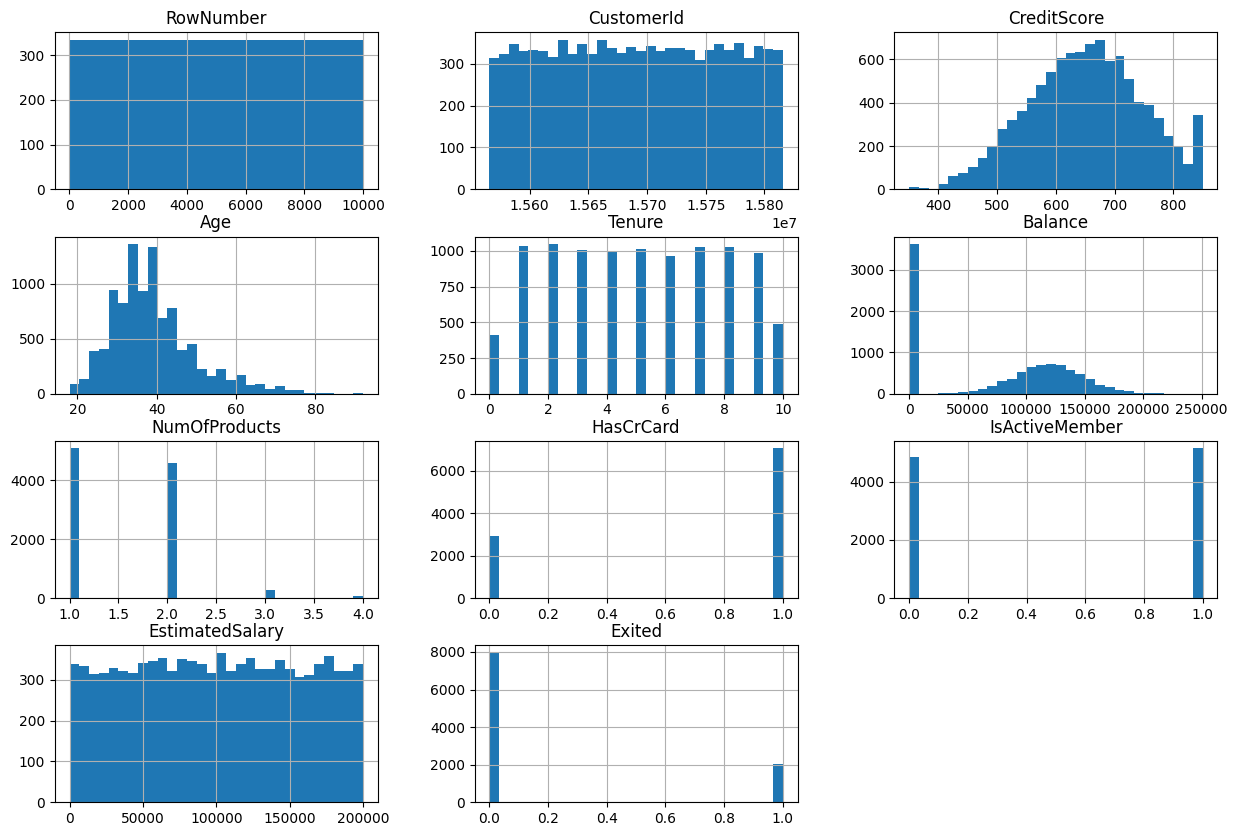

In [13]:
#Plot histograms for numerical features
df.hist(bins=30,figsize=(15,10))


In [14]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


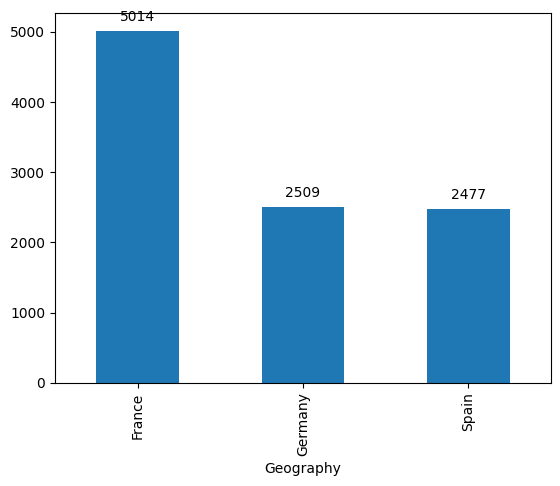

In [15]:
#Plot bar charts for categorical features
ax =df['Geography'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

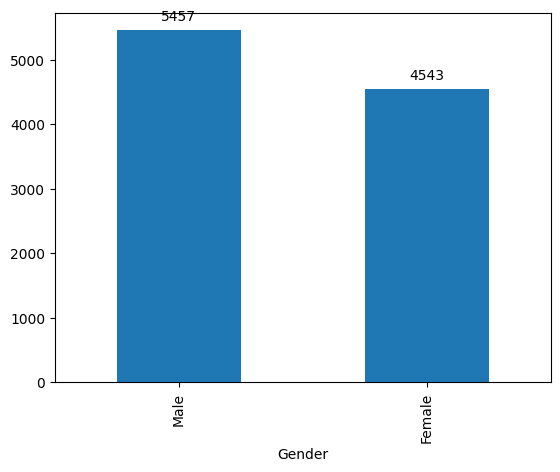

In [16]:
#Plot bar charts for categorical features
ax = df['Gender'].value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

In [21]:
#Creating a copy of the dataframe
df2=df.copy()

In [19]:
#Dropping unnecessary columns
columns_dropped = ['RowNumber'	,'CustomerId', ]
df = df.drop('Surname',axis=1)
df = df.drop(columns_dropped,axis=1)


In [23]:
X = df.drop('Exited', axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit label encoders for categorical features
geography_encoder = LabelEncoder()
geography_encoder.fit(X_train['Geography'])

gender_encoder = LabelEncoder()
gender_encoder.fit(X_train['Gender'])

LabelEncoder()

In [25]:
#Changing the categorical  data to numerical
for column in df.columns:
  if df[column].dtypes == np.number:
     continue
  df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-25-101df550a0b0>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtypes == np.number:
<ipython-input-25-101df550a0b0>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtypes == np.number:
<ipython-input-25-101df550a0b0>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtypes == np.number:
<ipython-input-25-101df550a0b0>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtypes == np.number:
<ipython-input-25-101df550a0b0>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is de

<Axes: >

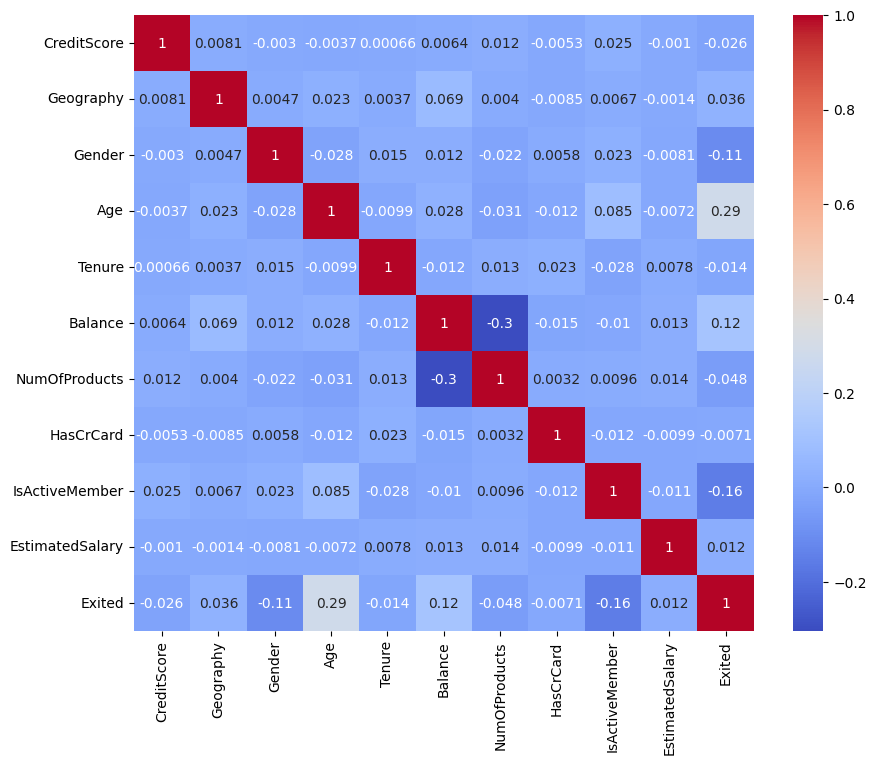

In [26]:
#Compute and visualize the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [27]:
import joblib

In [28]:
# Fit standard scaler for numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])

# Save the fitted encoders and scaler
joblib.dump(geography_encoder, 'geography_encoder.pkl')
joblib.dump(gender_encoder, 'gender_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Transform the training data
X_train['Geography'] = geography_encoder.transform(X_train['Geography'])
X_train['Gender'] = gender_encoder.transform(X_train['Gender'])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'churn_model.pkl')

['churn_model.pkl']

In [44]:
# Load the fitted encoders, scaler, and model
geography_encoder = joblib.load('geography_encoder.pkl')
gender_encoder = joblib.load('gender_encoder.pkl')
scaler = joblib.load('scaler.pkl')
model = joblib.load('churn_model.pkl')

def preprocess_input(df):
    # Transform categorical features using the loaded encoders
    df['Geography'] = geography_encoder.transform(df['Geography'])
    df['Gender'] = gender_encoder.transform(df['Gender'])

    # Transform numerical features using the loaded scaler
    numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
    df[numerical_features] = scaler.transform(df[numerical_features])

    return df

def predict(df):
    # Preprocess the input data
    df = preprocess_input(df)

    # Make predictions
    predictions = model.predict(df)
    prediction_proba = model.predict_proba(df)[:, 1]

    return predictions, prediction_proba

# Example usage
new_data = pd.DataFrame({
    'CreditScore': [228],
    'Geography': ['France'],
    'Gender': ['Male'],
    'Age': [24],
    'Tenure': [2],
    'Balance': [0.00],
    'NumOfProducts': [0],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [100000]
})

predictions, prediction_proba = predict(new_data)
print(predictions, prediction_proba)


[1] [0.62]
